In [2]:
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib as mpl
import matplotlib.pylab as plt
import seaborn as sns

## Data Load

In [3]:
train_16 = pd.read_csv('train_2016_v2.csv',parse_dates=['transactiondate'])

In [4]:
prop_16 = pd.read_csv('properties_2016.csv')

/home/hskimim/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (22,32,34,49,55) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
train_df1 = pd.merge(train_16,prop_16,on='parcelid', how ='left')

In [6]:
train_17 = pd.read_csv('train_2017.csv',parse_dates=['transactiondate'])

In [7]:
prop_17 = pd.read_csv('properties_2017.csv')

/home/hskimim/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (49) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [8]:
train_df2 = pd.merge(train_17,prop_17,on='parcelid', how ='left')

In [9]:
train_df = pd.concat([train_df1,train_df2])

In [11]:
train_df.head()

,parcelid,logerror,transactiondate,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,...,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
0,11016594,0.0276,2016-01-01,1.0,NaN,NaN,2.0,3.0,NaN,4.0,...,NaN,NaN,122754.0,360170.0,2015.0,237416.0,6735.88,NaN,NaN,6.037107e+13
1,14366692,-0.1684,2016-01-01,NaN,NaN,NaN,3.5,4.0,NaN,NaN,...,NaN,NaN,346458.0,585529.0,2015.0,239071.0,10153.02,NaN,NaN,NaN
2,12098116,-0.0040,2016-01-01,1.0,NaN,NaN,3.0,2.0,NaN,4.0,...,NaN,NaN,61994.0,119906.0,2015.0,57912.0,11484.48,NaN,NaN,6.037464e+13
3,12643413,0.0218,2016-01-02,1.0,NaN,NaN,2.0,2.0,NaN,4.0,...,NaN,NaN,171518.0,244880.0,2015.0,73362.0,3048.74,NaN,NaN,6.037296e+13
4,14432541,-0.0050,2016-01-02,NaN,NaN,NaN,2.5,4.0,NaN,NaN,...,2.0,NaN,169574.0,434551.0,2015.0,264977.0,5488.96,NaN,NaN,6.059042e+13


## Outer feature data analysis

- 'airconditioningtypeid'
- 'architecturalstyletypeid'
- 'buildingqualitytypeid'
- 'buildingclasstypeid'
- 'decktypeid'
- 'numberofstories'
- 'storytypeid'
- 'typeconstructiontypeid'
- 'unitcnt'
- 'yardbuildingsqft17'
- 'yardbuildingsqft26'
- 'yearbuilt'

In [13]:
outer_feature=['에이컨 아이디',
'건축 양식 아이디',
'건물 상태에 대한 평가 (최고부터 최악까지 평가가 매겨져 있다.)',
'건물 뼈대에 어떤 타입의 재료가 쓰였는지',
'집 마당 부근에 있는 갑판(테라스같은 것을 의미)',
'집의 층 수 (story or level이라고 표현한다.)',
'집의 층 수 (story or level이라고 표현한다.)',
'주택 건설에 사용 된 건축 자재의 유형',
'구조가 구축 된 단위 수 (예 : 2 = 이중, 3 = 삼중 등)',
'마당 안뜰',
'저장고 / 야적장',
'주거지가 지어진 해']
len(outer_feature)

12

In [14]:
outer_feature_col = ['airconditioningtypeid',
'architecturalstyletypeid',
'buildingqualitytypeid',
'buildingclasstypeid',
'decktypeid',
'numberofstories',
'storytypeid',
'typeconstructiontypeid',
'unitcnt',
'yardbuildingsqft17',
'yardbuildingsqft26',
'yearbuilt']
len(outer_feature_col)

12

In [20]:
outer_df = pd.DataFrame(columns=['name','feature'])
outer_df.name = outer_feature_col
outer_df.feature = outer_feature
outer_df

,name,feature
0,airconditioningtypeid,에이컨 아이디
1,architecturalstyletypeid,건축 양식 아이디
2,buildingqualitytypeid,건물 상태에 대한 평가 (최고부터 최악까지 평가가 매겨져 있다.)
3,buildingclasstypeid,건물 뼈대에 어떤 타입의 재료가 쓰였는지
4,decktypeid,집 마당 부근에 있는 갑판(테라스같은 것을 의미)
5,numberofstories,집의 층 수 (story or level이라고 표현한다.)
6,storytypeid,집의 층 수 (story or level이라고 표현한다.)
7,typeconstructiontypeid,주택 건설에 사용 된 건축 자재의 유형
8,unitcnt,"구조가 구축 된 단위 수 (예 : 2 = 이중, 3 = 삼중 등)"
9,yardbuildingsqft17,마당 안뜰


In [16]:
print(train_df[outer_feaure_col].dtypes,end='\n\n'),
print('Number of outer_feature_col:  {}'.format(len(outer_feaure_col)))

airconditioningtypeid       float64
architecturalstyletypeid    float64
buildingqualitytypeid       float64
buildingclasstypeid         float64
decktypeid                  float64
numberofstories             float64
storytypeid                 float64
typeconstructiontypeid      float64
unitcnt                     float64
yardbuildingsqft17          float64
yardbuildingsqft26          float64
yearbuilt                   float64
dtype: object

Number of outer_feature_col:  12


### Individual columns' feature analysis

### Regression plot about numerical data

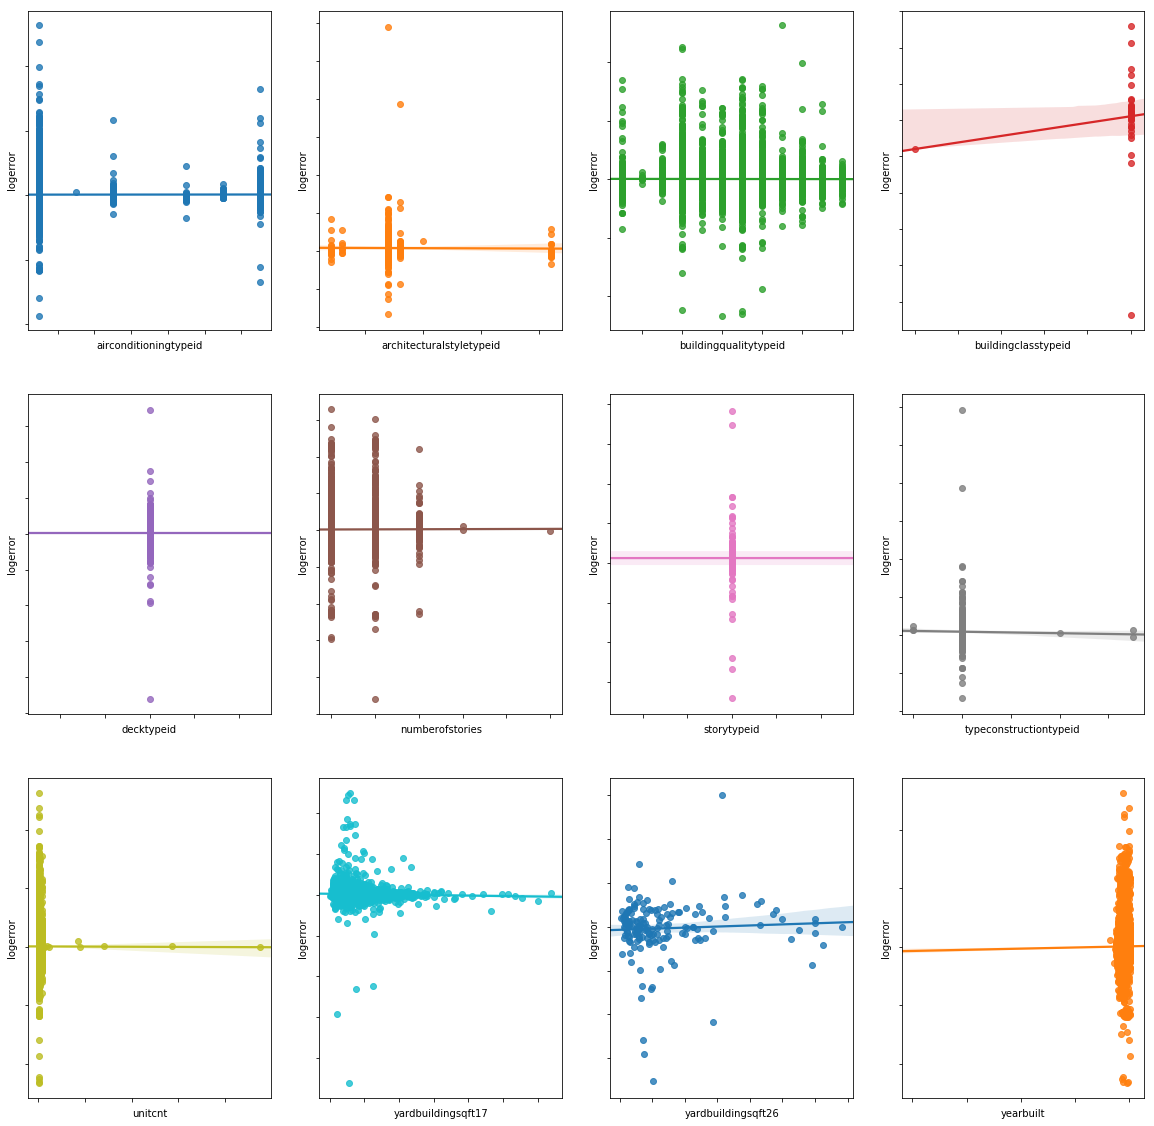

In [32]:
fig, ax = plt.subplots(3,4, figsize = (20,20))

for idx, n in enumerate(outer_feaure_col):
    sns.regplot(train_df[n], y=train_df.logerror, data=train_df, ax = ax[idx//4,idx%4])
    ax[idx//4, idx % 4].set(yticklabels=[])
    ax[idx//4, idx % 4].set(xticklabels=[])
    
    continue  

### Scatter plot about numerical data

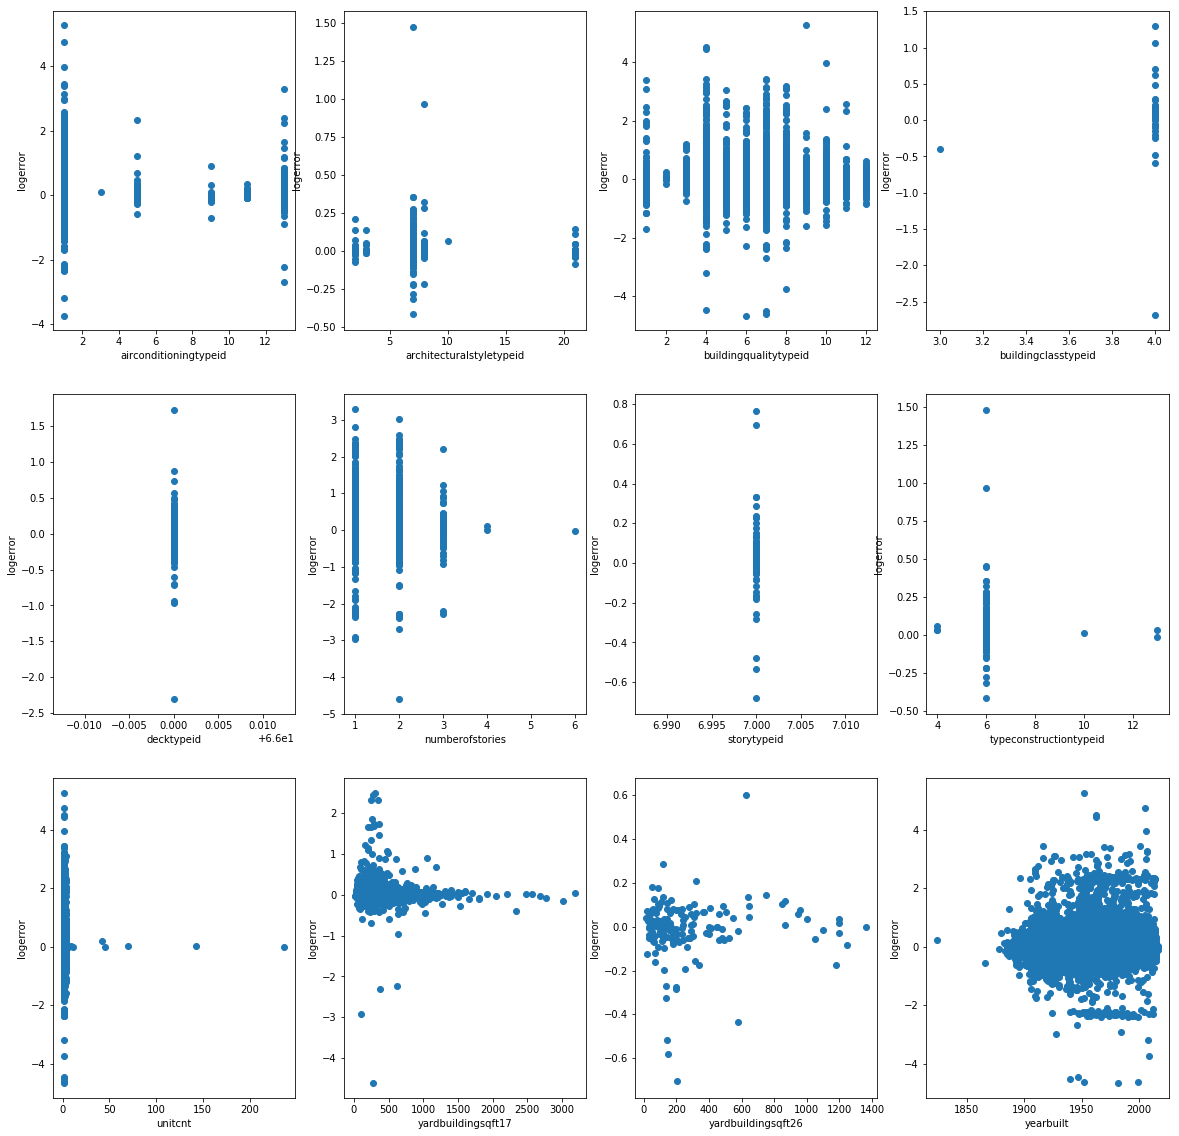

In [31]:
plt.figure(figsize=(20,20))
for idx,col in enumerate(outer_feaure_col):
    plt.subplot(3,4,idx+1)
    plt.scatter(train_df[col],train_df.logerror)
    plt.xlabel(col)
    plt.ylabel('logerror')
plt.show()

자료형은 numerical data로 나왔지만 scatter plot으로 봤을 때, 분포도가 continuous 하지 않다는 것을 알 수 있습니다. 이러한 데이터들을 따로 추출해서 histogram으로 나타내보겠습니다.

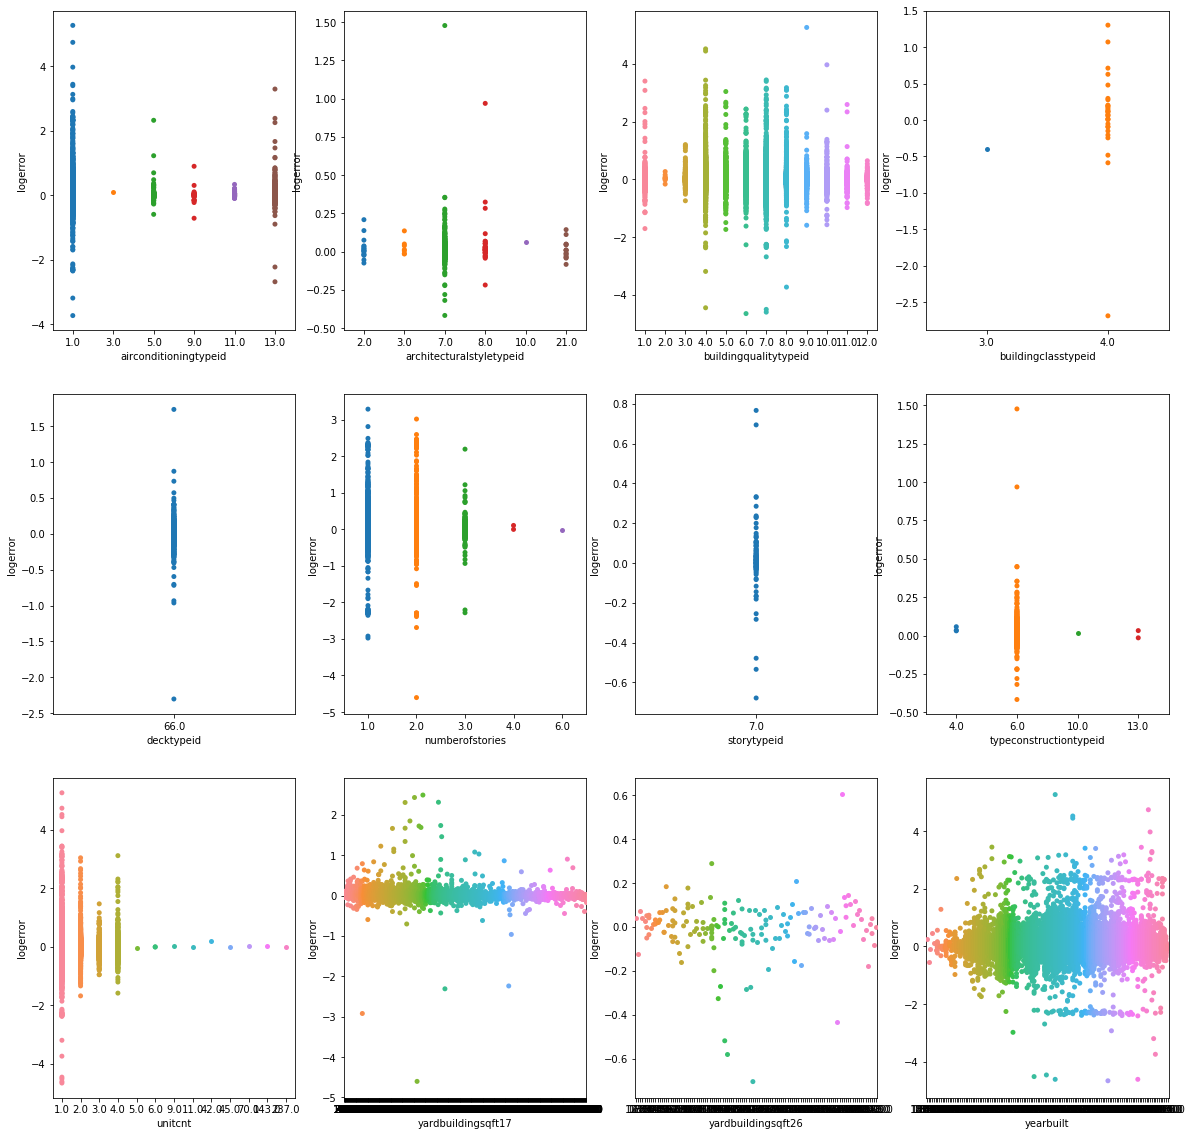

In [35]:
plt.figure(figsize=(20,20))
for idx,col in enumerate(outer_feaure_col):
    plt.subplot(3,4,idx+1)
    sns.stripplot(train_df[col],train_df.logerror)
    plt.xlabel(col)
    plt.ylabel('logerror')
plt.show()

#### stripplot 을 통해 확인한 것은 yardbuildingsqft17 , yardbuildingsqft26, yearbuilt 이 세 가지 columns 를 제외한 나머지 col들은 categorical 하게 distributed된다는 것입니다.

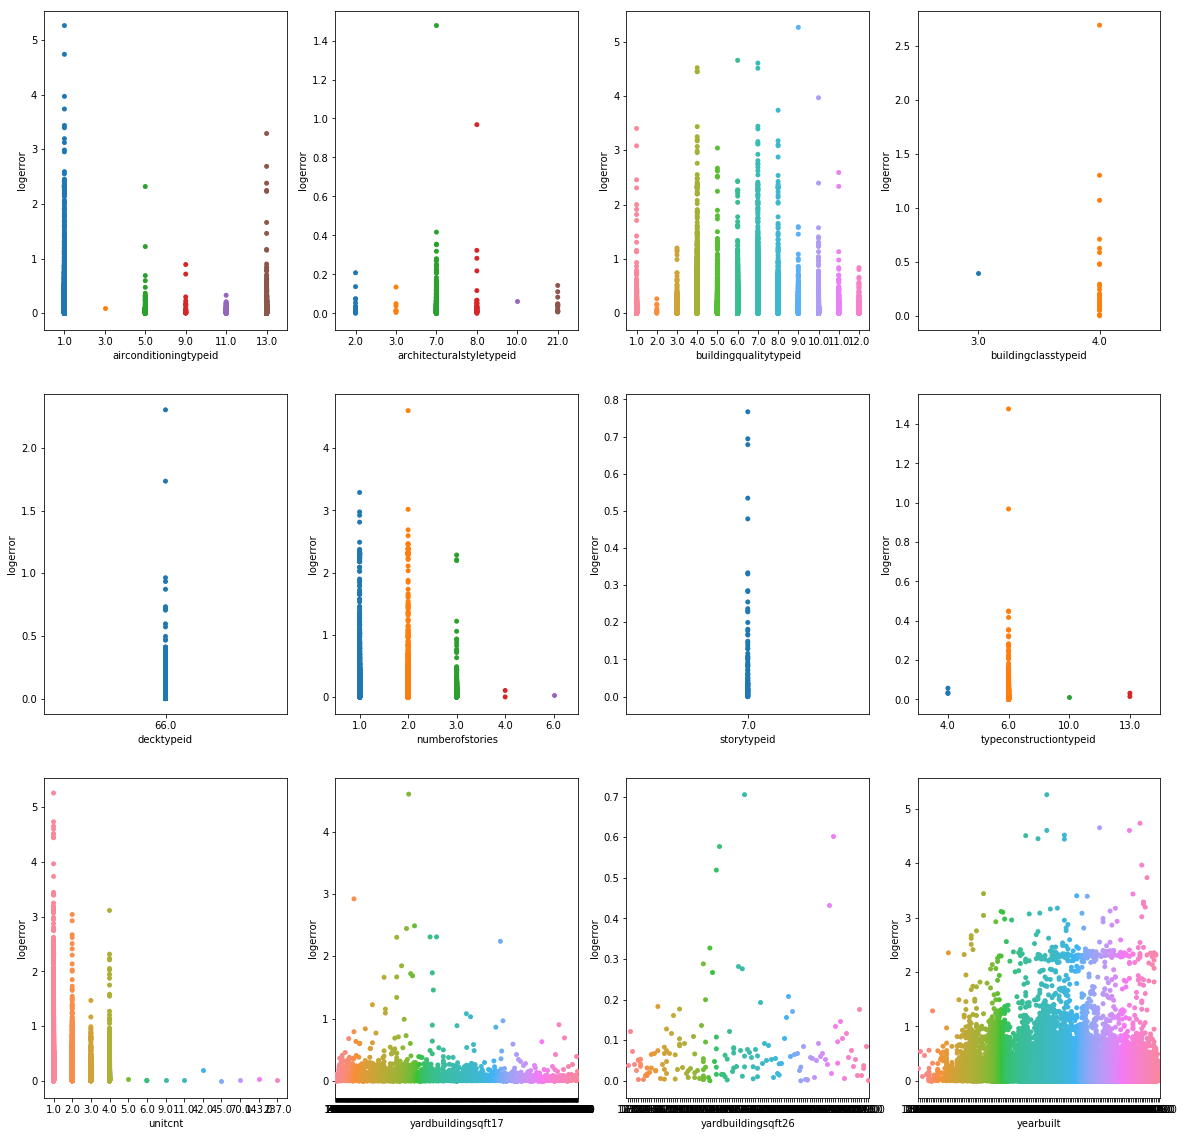

In [16]:
plt.figure(figsize=(20,20))
for idx,col in enumerate(outer_feature_col):
    plt.subplot(3,4,idx+1)
    sns.stripplot(train_df[col],np.abs(train_df.logerror))
    plt.xlabel(col)
    plt.ylabel('logerror')
plt.show()

#### 위의 stripplot은 absolute logerror 에 대한 outer structure columns들의 분포입니다.

## Comments